## Convolutional Neural Network

### Libraries

In [4]:
# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

# splitting tool for the validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
print("GPUS: ", tf.config.list_physical_devices('GPU'))

GPUS:  []


C:\Users\hf_co\AppData\Local\Temp\ipykernel_18336\2748741588.py:16: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### Data Loading

In [7]:
X = np.load('archive/X_2024-04-11_15-06-32.npy')
y = np.load('archive/Y_2024-04-11_15-06-32.npy')

### Splitting Train (70%), Validation (15%) and Test Datasets (15%)

In [8]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

x_train = x_train.reshape(-1, 64, 64, 1)
x_val = x_val.reshape(-1, 64, 64, 1)
x_test = x_test.reshape(-1, 64, 64, 1)

### Creating the CNN Model

In [12]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

### Summary of the Model

In [13]:
CNN_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,978 (621.01 KB)

 Trainable params: 158,978 (621.01 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation

In [14]:
CNN_model.compile(optimizer=Adam(learning_rate=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

### Training

In [15]:
results = CNN_model.fit(x_train, y_train, epochs=70, validation_data=(x_val,y_val))

Epoch 1/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.1066 - loss: 2.3036 - val_accuracy: 0.0777 - val_loss: 2.3033
Epoch 2/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1036 - val_loss: 2.3039
Epoch 3/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.0897 - loss: 2.2943 - val_accuracy: 0.1424 - val_loss: 2.1778
Epoch 4/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.2313 - loss: 2.0464 - val_accuracy: 0.5049 - val_loss: 1.5062
Epoch 5/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.5155 - loss: 1.3353 - val_accuracy: 0.6731 - val_loss: 1.0016
Epoch 6/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6558 - loss: 0.9898 - val_accuracy: 0.7346 - val_loss: 0.8086
Epoch 7/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7146 - loss: 0.8591 - val_accuracy: 0.8188 - val_loss: 0.6795
Epoch 8/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.7641 - loss: 0.7140 - val_accuracy: 0.8252 

### Plotting Training and Validating Accuracy/Loss

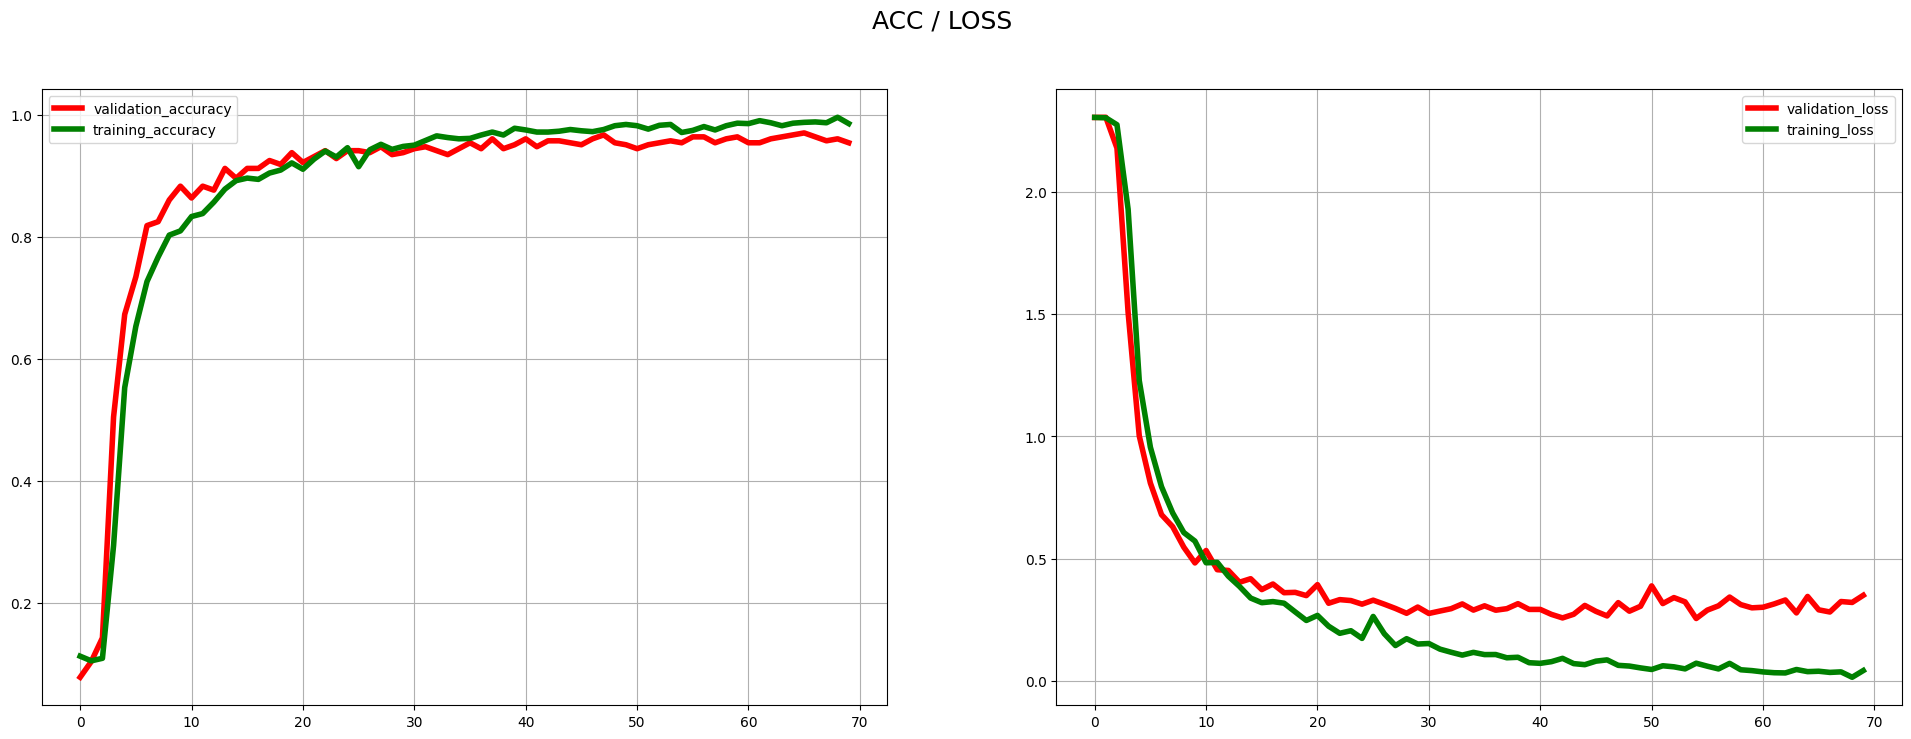

In [16]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

Based on the accuracy and loss plots, the neural network model is effectively learning from the training data and is also generalizing well to the validation data. There are no significant signs of overfitting, as the training and validation metrics are closely tracking each other.

### Test Accuracy/Loss

In [17]:
CNN_model.evaluate(x_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9563 - loss: 0.2235


[0.16643336415290833, 0.9612902998924255]

### Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.94      0.97      0.95        32
           2       0.97      0.95      0.96        41
           3       1.00      0.97      0.98        33
           4       0.86      0.90      0.88        20
           5       0.94      1.00      0.97        31
           6       0.97      0.97      0.97        31
           7       1.00      1.00      1.00        30
           8       1.00      0.91      0.95        34
           9       0.97      0.93      0.95        30

    accuracy                           0.96       310
   macro avg       0.96      0.96      0.96       310
weighted avg       0.96      0.96      0.96       310



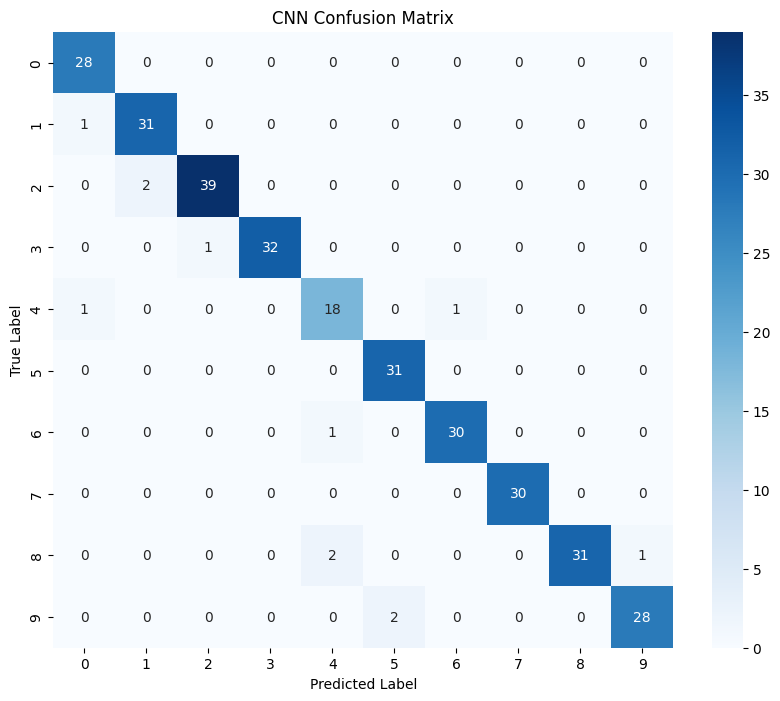

In [18]:
y_pred = CNN_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#print the classification report
print(classification_report(np.argmax(y_test,axis=1),y_pred_classes))

conf_matrix = confusion_matrix(np.argmax(y_test,axis=1),y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

### Predictions

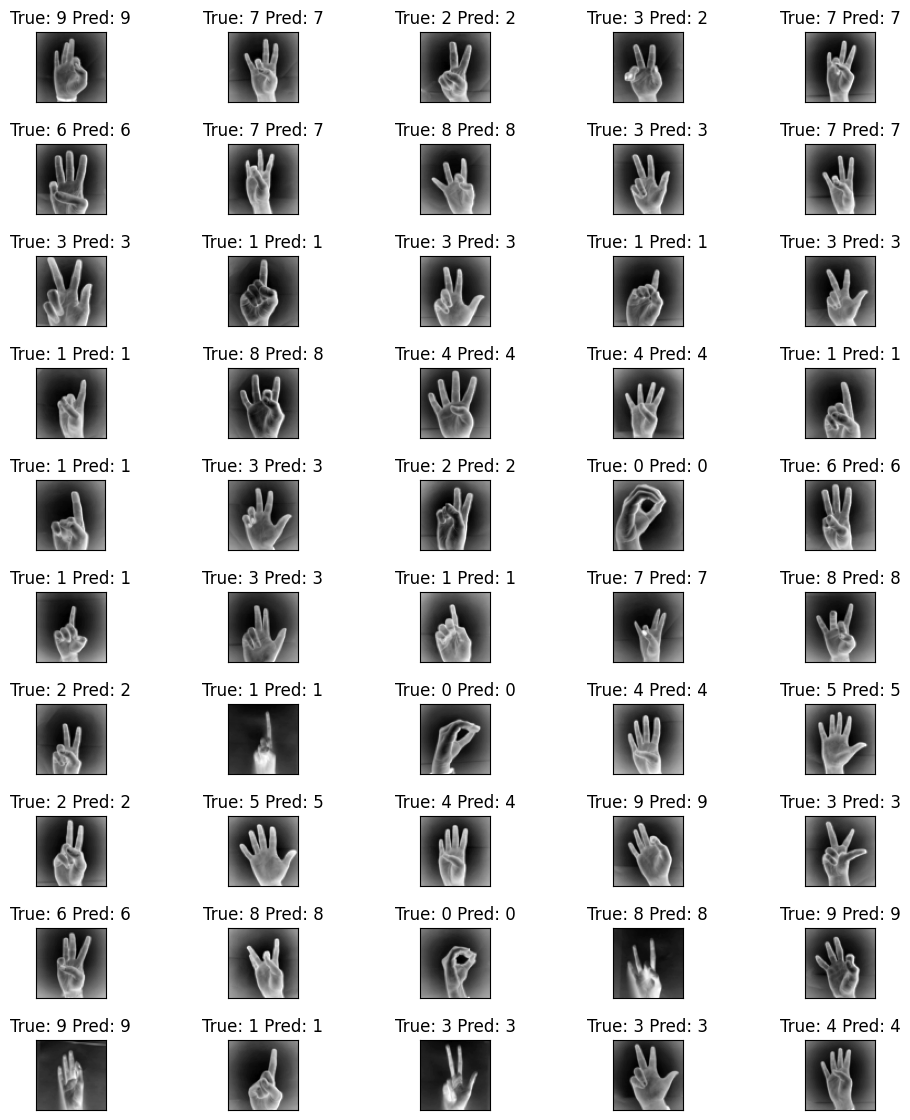

In [ ]:
x_val_test =  x_test.reshape(x_test.shape[0], 64, 64)

fig , axis = plt.subplots(10, 5, figsize = (12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_val_test[i], cmap = 'binary')
    ax.set(title = f"True: {y_test[i].argmax()} Pred: {y_pred[i].argmax()}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(hspace=0.6)
plt.show()

## Hyperparameter Tuning

In [19]:
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
                     activation='relu',
                     input_shape=(64,64,1)))
    model.add(MaxPooling2D())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Conv2D(filters=hp.Int('conv_2_filters', min_value=32, max_value=64, step=16),
                     kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
                     activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
                    activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='CNN_tuning',
    project_name='keras_tuner_CNN'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(x_train, y_train, epochs=70, validation_data=(x_val, y_val), callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
      Melhores hiperparâmetros encontrados:
      - Número de filtros da primeira camada convolucional: {best_hps.get('conv_1_filters')}
        - Tamanho do kernel da primeira camada convolucional: {best_hps.get('conv_1_kernel')}
        - Dropout da primeira camada: {best_hps.get('dropout_1')}
        - Número de filtros da segunda camada convolucional: {best_hps.get('conv_2_filters')}
        - Tamanho do kernel da segunda camada convolucional: {best_hps.get('conv_2_kernel')}
        - Dropout da segunda camada: {best_hps.get('dropout_2')}
        - Número de unidades da primeira camada densa: {best_hps.get('dense_1_units')}
        - Taxa de aprendizado: {best_hps.get('learning_rate')}
        """)

tuned_CNN_model = tuner.hypermodel.build(best_hps)
tuned_results = tuned_CNN_model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), callbacks=[early_stopping])

Reloading Tuner from CNN_tuning\keras_tuner_CNN\tuner0.json

      Melhores hiperparâmetros encontrados:
      - Número de filtros da primeira camada convolucional: 80
        - Tamanho do kernel da primeira camada convolucional: 3
        - Dropout da primeira camada: 0.0
        - Número de filtros da segunda camada convolucional: 32
        - Tamanho do kernel da segunda camada convolucional: 5
        - Dropout da segunda camada: 0.30000000000000004
        - Número de unidades da primeira camada densa: 112
        - Taxa de aprendizado: 7.967256753528906e-05
        


d:\Users\hf_co\Documents\GitHub\TAA-1-Project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.0998 - loss: 2.3063 - val_accuracy: 0.2104 - val_loss: 2.2891
Epoch 2/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.1841 - loss: 2.2824 - val_accuracy: 0.1489 - val_loss: 2.2787
Epoch 3/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.1581 - loss: 2.2619 - val_accuracy: 0.3366 - val_loss: 2.2013
Epoch 4/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.3485 - loss: 2.1715 - val_accuracy: 0.4498 - val_loss: 2.0283
Epoch 5/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.4553 - loss: 1.9489 - val_accuracy: 0.5761 - val_loss: 1.6881
Epoch 6/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5543 - loss: 1.6081 - val_accuracy: 0.5890 - val_loss: 1.3599
Epoch 7/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6501 - loss: 1.2310 - val_accuracy: 0.6634 - val_loss: 1.0959
Epoch 8/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.7055 - loss: 1.0164 - val_accuracy: 0.6990 - v

### Plotting Training and Validating Accuracy/Loss

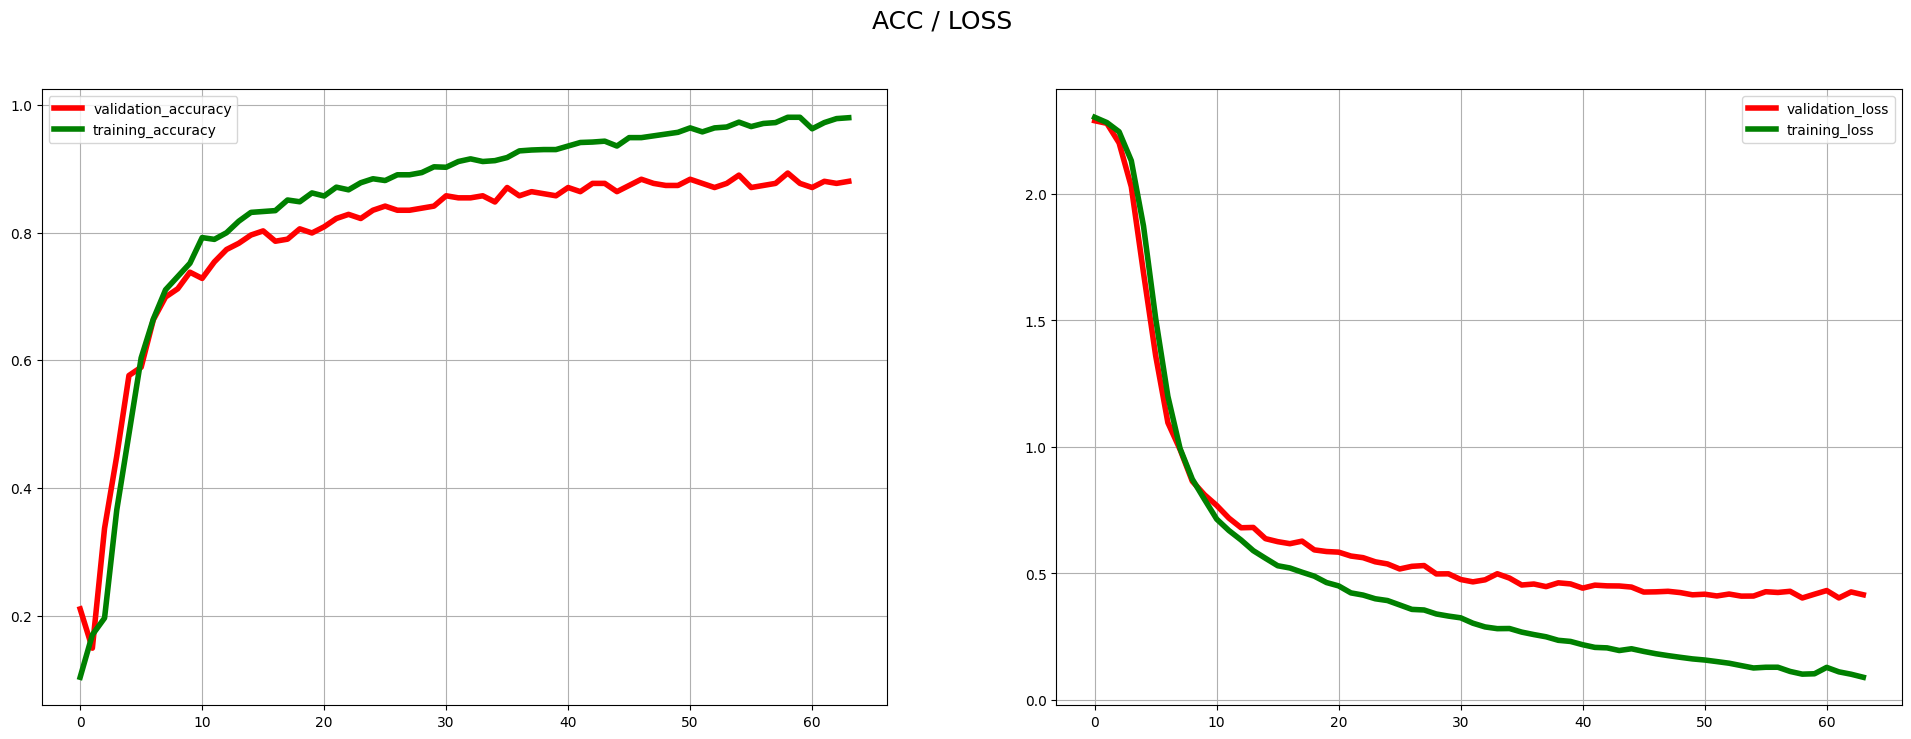

In [20]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(tuned_results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(tuned_results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(tuned_results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(tuned_results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

### Test Set Analysis

In [21]:
tuned_y_pred = tuned_CNN_model.predict(x_test)
tuned_y_pred_classes = np.argmax(tuned_y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, tuned_y_pred_classes))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      0.84      0.92        32
           2       0.86      0.78      0.82        41
           3       0.91      0.91      0.91        33
           4       0.81      0.85      0.83        20
           5       1.00      1.00      1.00        31
           6       0.88      0.90      0.89        31
           7       0.79      0.90      0.84        30
           8       0.88      0.88      0.88        34
           9       0.82      0.90      0.86        30

    accuracy                           0.89       310
   macro avg       0.90      0.90      0.89       310
weighted avg       0.90      0.89      0.89       310



### Confusion Matrix

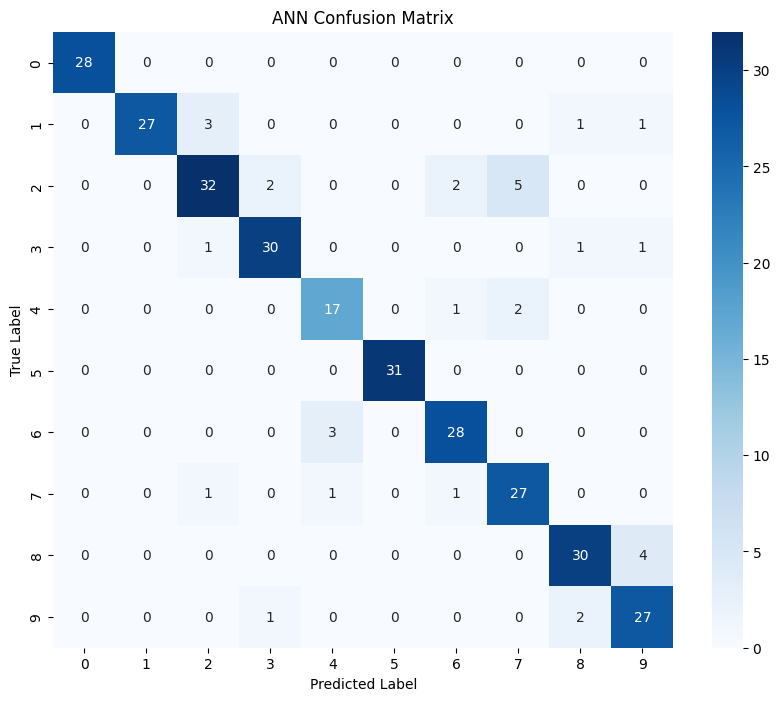

In [22]:
conf_matrix = confusion_matrix(np.argmax(y_test,axis=1),tuned_y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ANN Confusion Matrix')
plt.show()

### Predictions

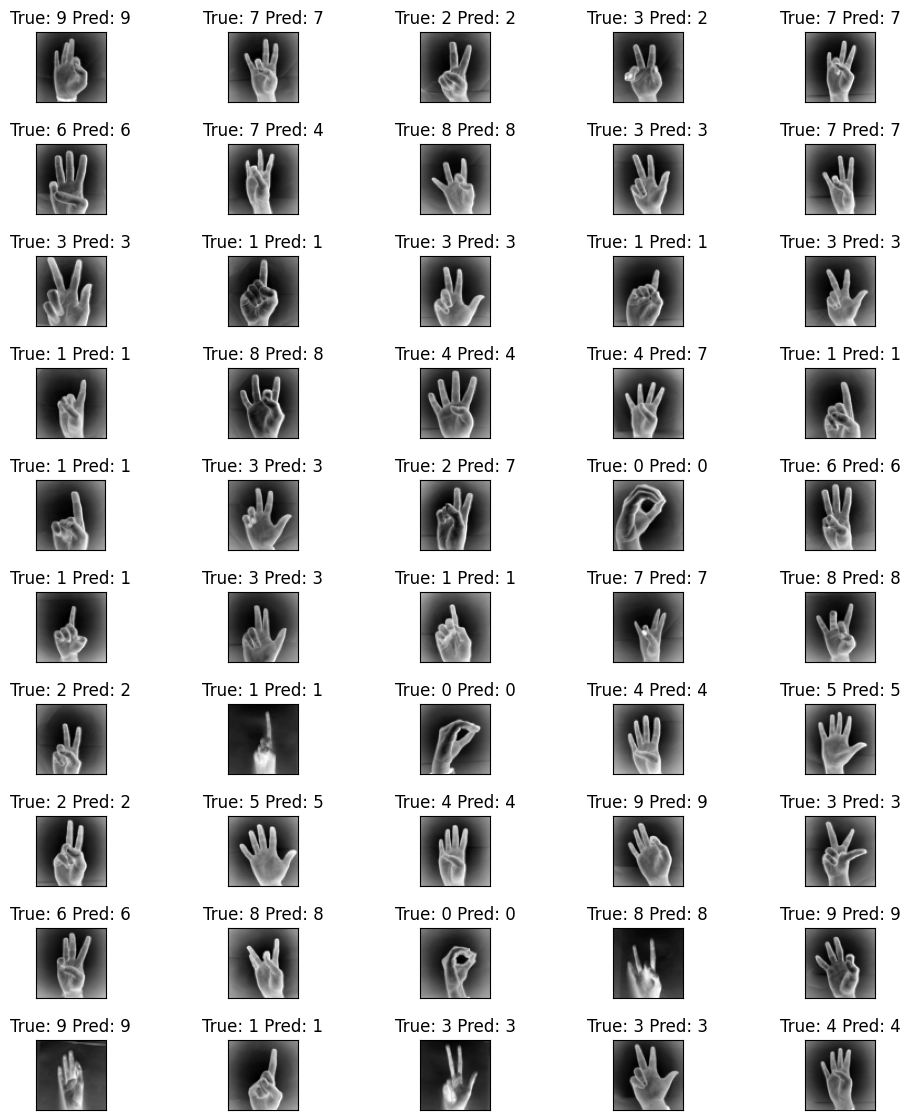

In [23]:
x_val_test =  x_test.reshape(x_test.shape[0], 64, 64)

fig , axis = plt.subplots(10, 5, figsize = (12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_val_test[i], cmap = 'binary')
    ax.set(title = f"True: {y_test[i].argmax()} Pred: {tuned_y_pred[i].argmax()}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(hspace=0.6)
plt.show()